In [26]:
import numpy as np
from sklearn import linear_model
import pandas as pd
from pandas import read_csv
from sklearn.linear_model import Ridge
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [2]:
# read data + clean data
alberta = read_csv('Alberta COVID Data - Alberta.csv')
alberta['Case status'].factorize()
alberta['Case status'] = pd.factorize(alberta['Case status'])[0]
# where 0 means that the patient recovered and 1 for when the patient died

# Convert gender to one hot
data_a = pd.DataFrame(alberta[{'Gender': ['F', 'M',]}])
gender_a = pd.get_dummies(data_a)
age_a = alberta['Age (y)']
# Merge relevant dataframes together
merged_a = pd.concat([age_a, gender_a], axis = 1, sort = False)
merged_a = pd.concat([merged_a, alberta['Case status']], axis = 1, sort = False)

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(merged_a[['Age (y)', 'Gender_F', 'Gender_M']], 
                                                    merged_a[['Case status']], test_size=0.4, random_state=0)

# Ridge Regression

In [39]:
clf_r = Ridge(alpha=1)
clf_r.fit(X_train, y_train)    # fit model
clf_r.score(X_test, y_test)    # accuracy score

0.0543621295148895

C:\Users\Super\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


Text(0.5, 1.0, 'Ridge Model')

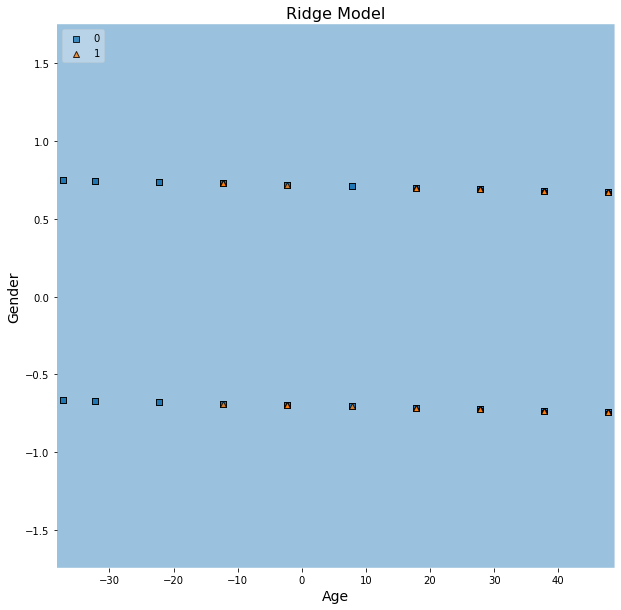

In [41]:
X = X_train.to_numpy(dtype = None)
y = np.ravel(y_train.to_numpy(dtype = None))
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

gs = gridspec.GridSpec(10, 10)
fig = plt.figure(figsize=(10, 10))

clf_r.fit(X, y)
fig = plot_decision_regions(X=X, y=y,
                                clf=clf_r, legend=2)

plt.xlabel("Age", size=14)
plt.ylabel("Gender", size=14)
plt.title('Ridge Model', size=16)

# Lasso Regression

In [16]:
clf_l = linear_model.Lasso(alpha=1)
clf_l.fit(X_train, y_train)
clf_l.coef_     # array([ 0., -0.,  0.])
clf_l.score(X_test, y_test)    # accuracy score - why is this negative?

-5.183312389034356e-05

C:\Users\Super\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


Text(0.5, 1.0, 'Lasso Model')

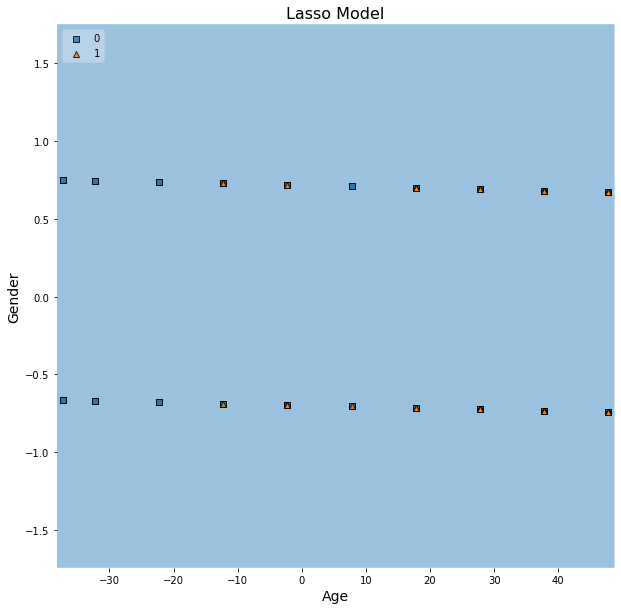

In [42]:
X = X_train.to_numpy(dtype = None)
y = np.ravel(y_train.to_numpy(dtype = None))
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

gs = gridspec.GridSpec(10, 10)
fig = plt.figure(figsize=(10, 10))

clf_l.fit(X, y)
fig = plot_decision_regions(X=X, y=y,
                                clf=clf_l, legend=2)

plt.xlabel("Age", size=14)
plt.ylabel("Gender", size=14)
plt.title('Lasso Model', size=16)

# Logistic Regression

In [34]:
clf_lg = LogisticRegression(C=1, class_weight = 'balanced')
clf_lg.fit(X_train, np.ravel(y_train))
clf_lg.predict(X_test)
clf_lg.score(X_test, y_test)

0.8732793255614832

In [35]:
# cross validation using kfold
kf = KFold(n_splits=5)
scores = cross_val_score(clf_lg, merged_a[['Age (y)', 'Gender_F', 'Gender_M']], np.ravel(merged_a[['Case status']]), 
                         scoring='accuracy', cv=kf)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.893 accuracy with a standard deviation of 0.020


Text(0.5, 1.0, 'Logistic Model')

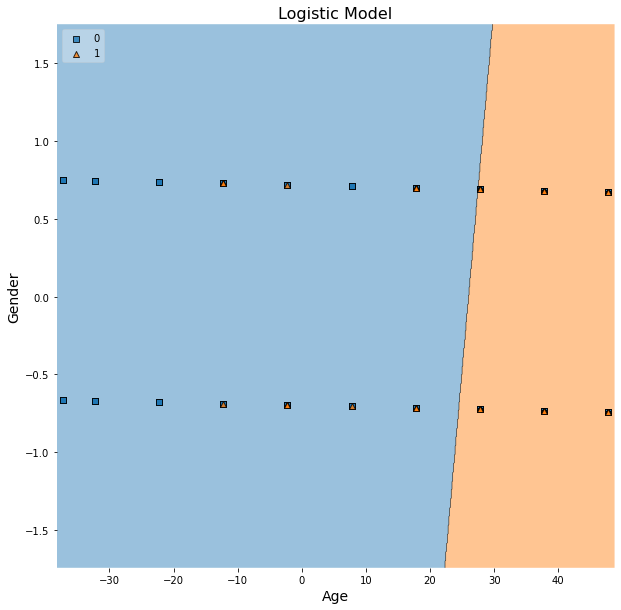

In [43]:
X = X_train.to_numpy(dtype = None)
y = np.ravel(y_train.to_numpy(dtype = None))
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

gs = gridspec.GridSpec(10, 10)
fig = plt.figure(figsize=(10, 10))

clf_lg.fit(X, y)
fig = plot_decision_regions(X=X, y=y,
                                clf=clf_lg, legend=2)

plt.xlabel("Age", size=14)
plt.ylabel("Gender", size=14)
plt.title('Logistic Model', size=16)

# SVM Model

In [18]:
clf_s = svm.SVC(class_weight = 'balanced', kernel='linear')
clf_s.fit(X_train, np.ravel(y_train))
clf_s.coef_

array([[ 1.00025554e-01,  2.91038305e-11, -3.29691829e-11]])

In [20]:
# predict using svm
predict_a = clf_s.predict(X_test)
unique, counts = np.unique(predict_a, return_counts=True)
dict(zip(unique, counts))
# 0 indicates the patient will survive and 1 indicates the patient will pass away

{0: 26182, 1: 4184}

In [21]:
clf_s.score(X_test, y_test)

0.8732793255614832

In [23]:
# cross validation using kfold
kf = KFold(n_splits=5)
scores = cross_val_score(clf_s, merged_a[['Age (y)', 'Gender_F', 'Gender_M']], np.ravel(merged_a[['Case status']]), 
                         scoring='accuracy', cv=kf)
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.920 accuracy with a standard deviation of 0.036


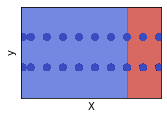

In [24]:
# graphing using method from tutorial

X = X_train.iloc[:,:2].to_numpy()
y = np.ravel(y_train)
h = .02  # step size in the mesh
C = 1.0  # SVM regularization parameter
svc = svm.SVC(class_weight= "balanced", kernel='linear')
svc.fit(X, np.ravel(y))
#rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
#poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
#lin_svc = svm.LinearSVC(C=C).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

Text(0.5, 1.0, 'SVM Model')

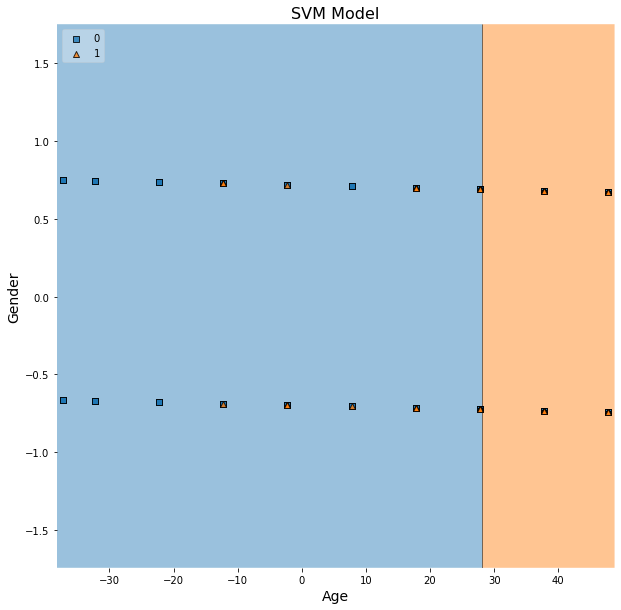

In [25]:
# another graphing method

from mlxtend.plotting import plot_decision_regions    # need to install first using pip in command prompt
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA

X = X_train.to_numpy(dtype = None)
y = np.ravel(y_train.to_numpy(dtype = None))
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

gs = gridspec.GridSpec(10, 10)
fig = plt.figure(figsize=(10, 10))

clf_s.fit(X, y)
fig = plot_decision_regions(X=X, y=y,
                                clf=clf_s, legend=2)

plt.xlabel("Age", size=14)
plt.ylabel("Gender", size=14)
plt.title('SVM Model', size=16)